# Lab 01: Data pre-processing

- Student ID: 21120428
- Student name: Lương Thành Đạt

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'c:\\Users\\ADMIN\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
raw_df = pd.read_csv('./data/spaceX_laucnh.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/spaceX_laucnh.csv'

In [ ]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [ ]:
shape = raw_df.shape

In [ ]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?


Mỗi dòng thể hiện một lượt phóng tên lửa, gồm các thông tin về loại tên lửa, vị trí cất cánh và hạ cánh, kết quả,... 
Mỗi dòng có ý nghĩa khác nhau vì mô tả một lần phóng tên lửa

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [ ]:
num_duplicated_rows = raw_df.duplicated().sum()

In [ ]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [ ]:
metadata = pd.read_json('./data/metadata.json')

In [ ]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
uct_time,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch date in UTC format.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
payloads,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The list information about the payloads on the launch.
rocket_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the rocket.
rocket_boosters,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The number of boosters on the rocket.
rocket_height,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The height information about the rocket (m).
rocket_diameter,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The diameter information about the rocket (m).
rocket_mass,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The mass information about the rocket (kg).
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.


**TODO: Describe datatype**

In [ ]:
raw_df.dtypes

uct_time             object
launch_name          object
payloads             object
rocket_name          object
rocket_boosters       int64
rocket_height       float64
rocket_diameter     float64
rocket_mass         float64
launchpad_name       object
launchpad_region     object
launchpad_geo        object
landpad             float64
landpad_name         object
landpad_type         object
landpad_region       object
landpad_geo          object
outcome              object
dtype: object

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [ ]:
dtypes = raw_df.dtypes

In [ ]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [ ]:
raw_df['uct_time'] = pd.to_datetime(raw_df['uct_time'])

In [ ]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [ ]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


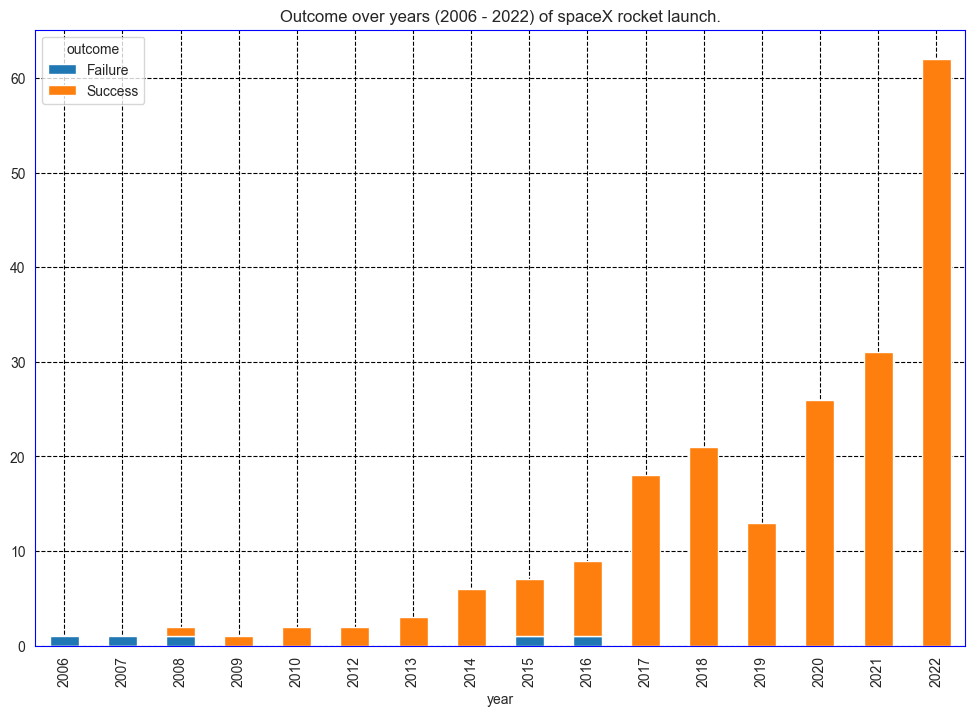

In [ ]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

Lượt đồ mô tả số lần thành công và thất bại của các lần phóng qua các năm
Màu xanh là thất bại, màu cam là thành công, cho thấy trong những năm đầu, thất bại khá nhiều (nhiều hơn thành công), trở về sau (từ 2009) thành công nhiều hơn thất bại

### Exploring numerical attributes

In [ ]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [ ]:
def missing_ratio(s):
    return round(s.isnull().sum() / len(s) * 100, 1)

def median(df):
    return round(df.median(), 1)

def lower_quartile(df):
    return round(df.quantile(0.25), 1)

def upper_quartile(df):
    return round(df.quantile(0.75), 1)

In [ ]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [ ]:
raw_df = raw_df.drop('landpad', axis=1)

In [ ]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [ ]:
# YOUR CODE HERE
## Mean fill
num_col_df['mean_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mean())

In [ ]:
# YOUR CODE HERE
## Median fill
num_col_df['median_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].median())

In [ ]:
# YOUR CODE HERE
## Mode fill
num_col_df['mode_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mode())

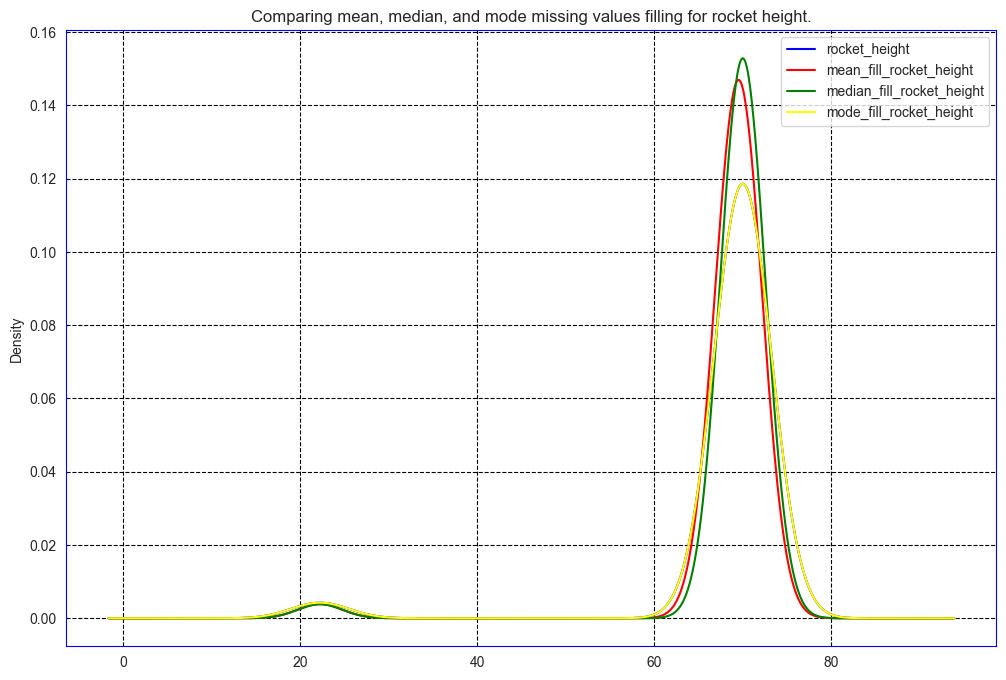

In [ ]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

Biểu đồ so sánh phân phối chiều cao của các tên lửa qua các phương pháp điền
Biểu đồ cho thấy các đường rất gần nhau, thể hiện các giá trị trung bình, trung vị, mode là rất gần nhau, cho thấy chiều cao của tên lửa là phân phối đối xứng và việc điền không làm thay đổi quá nhiều

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [ ]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
print(raw_df["rocket_name"].unique())

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name
    
    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    max = raw_df[raw_df['rocket_name'] == rocket_name]['rocket_height'].max()
    min = raw_df[raw_df['rocket_name'] == rocket_name]['rocket_height'].min()
    return [max, min]

['Falcon 1' 'Falcon 9' 'Falcon Heavy']


In [ ]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [ ]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [ ]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [ ]:
# TODO:
# YOUR CODE HERE
def fill(row):
    if pd.isnull(row['rocket_height']): 
        return checking_range(row['rocket_name'])[0]
    return row['rocket_height']
    

def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    # df['rocket_height'].fillna(checking_range(df['rocket_name'])[0], inplace=True)
    df['rocket_height'] = df.apply(fill, axis=1)
    cp_df = df.copy()
    return cp_df
    
raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [ ]:
# YOUR CODE HERE
raw_df['rocket_diameter'].fillna(raw_df['rocket_diameter'].mean(), inplace =True)
raw_df['rocket_mass'].fillna(raw_df['rocket_mass'].mean(), inplace =True)


In [ ]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [ ]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893 

**TODO** What type of each numerical attribute? Continous?  variable?

**rocket_boosters**: discrete\
**rocket_height**:     continuous\
**rocket_diameter**:   continuous\
**rocket_mass**:       continuous

### Exploring non-numerical attributes

In [ ]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [ ]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    return json.loads(s.replace("'", '"').replace("None", 'null'))


Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [ ]:
# TODO:
# YOUR CODE HERE
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df['payloads'] = cate_col_df['payloads'].apply(lambda x: str(x))

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [ ]:
def missing_ratio(s):
    return (s.isnull().sum() / len(s) * 100).round(1)

def num_values(s):
    return s.nunique()

def value_ratios(s):
    non_missing_count = len(s)
    # Tạo một Series chứa số lần xuất hiện của mỗi giá trị (loại dữ liệu phân loại)
    value_counts = s.value_counts()
    
    # Tính tỷ lệ phần trăm của mỗi giá trị
    percentages = ((value_counts / non_missing_count) * 100).round(1)
    
    # Sắp xếp giảm dần theo tỷ lệ phần trăm
    sorted_percentages = percentages.sort_values(ascending=False)
    
    # Chuyển đổi Series thành từ điển
    value_percentage_dict = sorted_percentages.to_dict()
    return value_percentage_dict
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'COTS 1': 1.0, 'CRS-1': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TD...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 30.6, 'JRTI': 19.6, 'ASOG': 10.0, 'LZ-1': 8.6, 'LZ-4': 2.9, 'JRTI-1': 1.0}","{'ASDS': 61.2, 'RTLS': 11.5, 'Ocean': 3.3}","{'Florida': 28.2, 'California': 24.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [ ]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?


Không nên xóa, miss không quá nhiều

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `raw_df`.

In [ ]:
# TODO:
# YOUR CODE HERE
cate_col_df.drop(cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()].index, inplace=True)
cate_col_df.drop(cate_col_df[cate_col_df['landpad_type'] == 'Ocean'].index, inplace=True)

In [ ]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [ ]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'SSO-A': 0.7, 'CRS-7': 0.7, 'OG-2 Missio...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 38.8, 'California': 33.6}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California |
| JRTI  | ASDS  | Florida  |
| ASOG  | RTLS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

YOUR ANSWER HERE

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`

YOUR ANSWER HERE

In [ ]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    # df.loc[df['landpad_name'].isin(['OCISLY', 'JRTI', 'JRTI-1']), 'landpad_type'] = 'ASDS'
    # df.loc[df['landpad_name'].isin(['ASOG', 'LZ-1', 'LZ-4']), 'landpad_type'] = 'RTLS'
    
    df.loc[df['landpad_name'].isin(['OCISLY', 'LZ-4']), 'landpad_region'] = 'California'
    df.loc[df['landpad_name'].isin(['JRTI','ASOG', 'LZ-1', 'JRTI-1']), 'landpad_region'] = 'Florida'
    
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

In [ ]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df


,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'SSO-A': 0.7, 'CRS-7': 0.7, 'OG-2 Missio...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [ ]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [ ]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)
raw_df = raw_df.explode('payloads')
raw_df['payloads'] = raw_df['payloads'].apply(lambda x: str(x))
raw_df.drop(raw_df[raw_df["landpad_name"].isnull() & raw_df["landpad_type"].isnull() & raw_df["landpad_region"].isnull()].index, inplace=True)
raw_df.drop(raw_df[raw_df['landpad_type'] == 'Ocean'].index, inplace=True)
raw_df = fill_landpadregion(raw_df)
# YOUR CODE HERE

In [ ]:
# TEST 01
assert raw_df.shape == (152, 16)

In [ ]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'SSO-A': 0.7, 'CRS-7': 0.7, 'OG-2 Missio...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [ ]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,0
18,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 3669, 'orbit': 'GTO'}"
21,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 5875, 'orbit': 'SSO'}"
23,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,"{'type': 'Satellite', 'mass': 9600, 'orbit': 'PO'}"
24,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,"{'type': 'Satellite', 'mass': 5200, 'orbit': 'GTO'}"
25,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,"{'type': 'Satellite', 'mass': 3700, 'orbit': 'GTO'}"
...,...,...,...,...,...,...,...,...,...,...,...
182,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN
183,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,NaN
184,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN
185,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,NaN


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [ ]:
# YOUR CODE HERE
cate_col_df2.drop(cate_col_df2[cate_col_df2[0].isnull()].index, inplace=True)
cate_col_df2[0] = cate_col_df2[0].apply(str2dict)
cate_col_df2[['type', 'mass', 'orbit']] = cate_col_df2[0].apply(pd.Series)
# Drop rows with NaN values in all three columns
cate_col_df2.dropna(subset=['type', 'mass', 'orbit'], how='all', inplace=True)

# Drop rows with NaN values in any two columns
cate_col_df2.dropna(subset=['type', 'mass', 'orbit'], thresh=1, inplace=True)
cate_col_df2.drop(columns=0, inplace = True )

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [ ]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2['mass'].isnull()].index

In [ ]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [ ]:
cate_col_df2.drop(drop_idx, inplace=True)

In [ ]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])
c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
#assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [ ]:
# Step 01: unpack `payloads`
# YOUR CODE HERE

raw_df.drop(raw_df[raw_df['payloads'].isnull()].index, inplace=True)
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df[['type', 'mass', 'orbit']] = raw_df['payloads'].apply(pd.Series)
raw_df.drop(columns='payloads', inplace =True)


In [ ]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df.rename(columns={'type': 'payloads_type', 'mass':'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)

In [ ]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], how='all', inplace=True)

# Drop rows with NaN values in any two columns
raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], thresh=1, inplace=True)

In [ ]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
raw_df.drop(raw_df[raw_df['payloads_mass'].isnull()].index, inplace= True)

In [ ]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [ ]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [ ]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return (json.loads(s.replace('nan', 'null').replace('(', '[').replace(')', ']')))

print(raw_df['launchpad_geo'].unique())

['(28.5618571, -80.577366)' '(34.632093, -120.610829)'
 '(28.6080585, -80.6039558)']


In [ ]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [ ]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [ ]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `one hot encoding`, and for `nominal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

launch_name is nominal

In [ ]:
launch_name_unique = raw_df['launch_name'].unique()
print(launch_name_unique)
raw_df = pd.get_dummies(raw_df, columns=['launch_name'])

['CRS-5' 'CRS-6' 'CRS-7' 'OG-2 Mission 2' 'Jason 3' 'SES-9' 'CRS-8'
 'JCSAT-2B' 'Thaicom 8' 'ABS-2A / Eutelsat 117W B' 'CRS-9' 'JCSAT-16'
 'Amos-6' 'Iridium NEXT Mission 1' 'CRS-10' 'SES-10' 'CRS-11'
 'BulgariaSat-1' 'Iridium NEXT Mission 2' 'CRS-12' 'FormoSat-5'
 'Boeing X-37B OTV-5' 'Iridium NEXT Mission 3' 'SES-11 / Echostar 105'
 'KoreaSat 5A' 'CRS-13' 'Falcon Heavy Test Flight' 'TESS' 'Bangabandhu-1'
 'Telstar 19V' 'Iridium NEXT Mission 7' 'Merah Putih' 'Telstar 18V'
 'SAOCOM 1A' 'Es’hail 2' 'SSO-A' 'CRS-16' 'Iridium NEXT Mission 8'
 'Nusantara Satu (PSN-6) / S5 / Beresheet' 'CCtCap Demo Mission 1'
 'ArabSat 6A' 'CRS-17' 'Starlink v0.9' 'RADARSAT Constellation' 'STP-2'
 'CRS-18' 'Starlink-1' 'CRS-19' 'JCSat 18 / Kacific 1' 'Starlink-2'
 'Starlink-3' 'Starlink-4' 'CRS-20' 'Starlink-5' 'Starlink-6'
 'CCtCap Demo Mission 2' 'Starlink-7' 'Starlink-8 & SkySat 16-18'
 'GPS III SV03 (Columbus)' 'ANASIS-II'
 'Starlink-9 (v1.0) & BlackSky Global 5-6'
 'Starlink-10 (v1.0) & SkySat 19-21' 'S

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

rocket_name is nominal

In [ ]:
# YOUR CODE HERE
rocket_name_unique = raw_df['rocket_name'].unique()
print(rocket_name_unique)
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'])

['Falcon 9' 'Falcon Heavy']


Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

launchpad_name is nominal

In [ ]:
# YOUR CODE HERE
launchpad_name_unique = raw_df['launchpad_name'].unique()
print(launchpad_name_unique)
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'])

['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

launchpad_region is nominal

In [ ]:
# YOUR CODE HERE
launchpad_region_unique = raw_df['launchpad_region'].unique()
print(launchpad_region_unique)
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'])

['Florida' 'California']


Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

landpad_name is nominal

In [ ]:
# YOUR CODE HERE
landpad_name_unique = raw_df['landpad_name'].unique()
print(landpad_name_unique)
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'])

['JRTI-1' 'OCISLY' 'LZ-1' 'JRTI' 'LZ-4' 'ASOG']


Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

landpad_type is nominal

In [ ]:
# YOUR CODE HERE
landpad_type_unique = raw_df['landpad_type'].unique()
print(landpad_type_unique)
raw_df = pd.get_dummies(raw_df, columns=['landpad_type'])

['ASDS' 'RTLS']


Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

landpad_region is nominal

In [ ]:
# YOUR CODE HERE
landpad_region_unique = raw_df['landpad_region'].unique()
print(landpad_region_unique)
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'])

['Florida' 'California']


Step 08: `outcome` checking, is this `ordinal` or `nominal`?

outcome is nominal

In [ ]:
# YOUR CODE HERE
outcome_unique = raw_df['outcome'].unique()
print(outcome_unique)
raw_df = pd.get_dummies(raw_df, columns=['outcome'])

['Success' 'Failure']


Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

payloads_type is nominal

In [ ]:
# YOUR CODE HERE
payloads_type_unique = raw_df['payloads_type'].unique()
print(payloads_type_unique)
raw_df = pd.get_dummies(raw_df, columns=['payloads_type'])

['Dragon 1.1' 'Satellite' 'Crew Dragon' 'Dragon 2.0']


Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

payloads_orbit is nominal

In [ ]:
# YOUR CODE HERE
payloads_orbit_unique = raw_df['payloads_orbit'].unique()
print(payloads_orbit_unique)
raw_df = pd.get_dummies(raw_df, columns=['payloads_orbit'])

['ISS' 'LEO' 'PO' 'GTO' 'SSO' 'HCO' 'HEO' 'VLEO' 'MEO' 'GEO' 'TLI']


After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [ ]:
# YOUR CODE HERE
raw_df.dtypes

uct_time               datetime64[ns, UTC]
rocket_boosters                      int64
rocket_height                      float64
rocket_diameter                    float64
rocket_mass                        float64
                              ...         
payloads_orbit_MEO                    bool
payloads_orbit_PO                     bool
payloads_orbit_SSO                    bool
payloads_orbit_TLI                    bool
payloads_orbit_VLEO                   bool
Length: 185, dtype: object

In [ ]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# print(int_cols)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# print(float_cols)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [ ]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

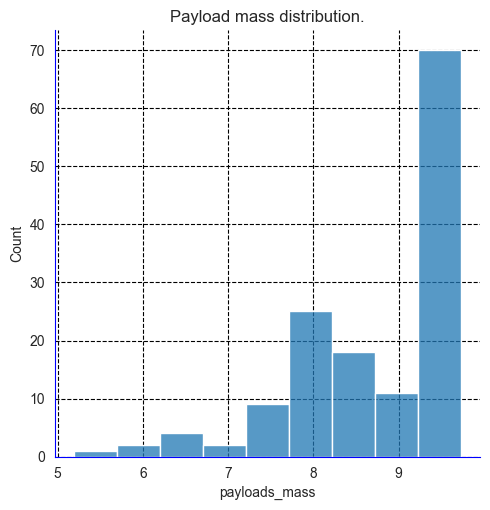

In [ ]:
sns.displot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
mass_max = raw_df['payloads_mass'].max()
mass_min = raw_df['payloads_mass'].min()
mass_range = mass_max - mass_min

In [ ]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [ ]:
# YOUR CODE HERE
upper_interval = int(np.ceil(mass_max))
lower_interval = int(np.floor(mass_min))
print(lower_interval, upper_interval)

180 16795


In [ ]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [ ]:
# YOUR CODE HERE
interval_size = int(round(mass_range / 4))
total_bins = 4
intervals = [i for i in range(lower_interval, upper_interval+interval_size, interval_size)]
intervals

[180, 4334, 8488, 12642, 16796]

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [ ]:
# YOUR CODE HERE

labels = ['bin_'+ str(i) for i in range(1, len(intervals))]
labels

['bin_1', 'bin_2', 'bin_3', 'bin_4']

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [ ]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(x = raw_df['payloads_mass'], bins=intervals, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

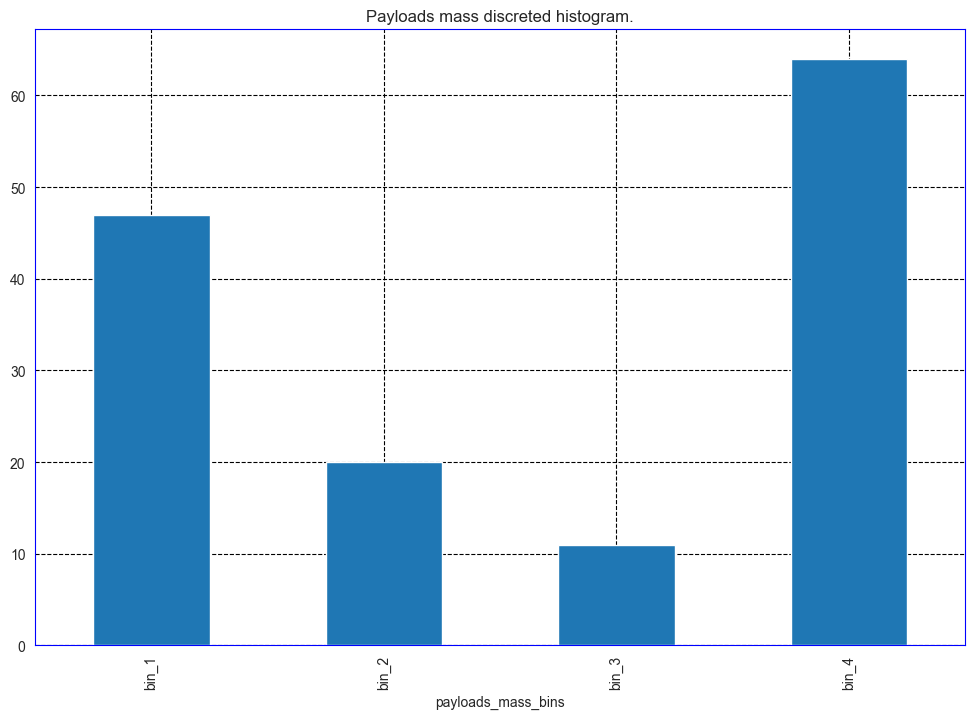

In [ ]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

Cho thấy số lượng trong mỗi khoảng là không đồng đều

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [ ]:
# YOUR CODE HERE
mass_disccretised, intervals = pd.qcut(raw_df['payloads_mass'], 4, labels=None, retbins=True, precision=3, duplicates='raise')
print(pd.concat([mass_disccretised, raw_df['payloads_mass']], axis=1).head(10))
print(intervals)

         payloads_mass  payloads_mass
18  (179.999, 3401.75]         2395.0
21  (179.999, 3401.75]         1898.0
23  (179.999, 3401.75]         1952.0
24  (179.999, 3401.75]         2034.0
25  (179.999, 3401.75]          553.0
26   (3401.75, 9600.0]         5271.0
27  (179.999, 3401.75]         3136.0
28   (3401.75, 9600.0]         4696.0
29  (179.999, 3401.75]         3100.0
30   (3401.75, 9600.0]         3600.0
[  180.    3401.75  9600.   14760.   16795.  ]


- Step 02: Create bin labels

In [ ]:
# YOUR CODE HERE
labels = ['bin_'+ str(i) for i in range(1, len(intervals))]
labels

['bin_1', 'bin_2', 'bin_3', 'bin_4']

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [ ]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(x = raw_df['payloads_mass'], bins=intervals, labels=labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

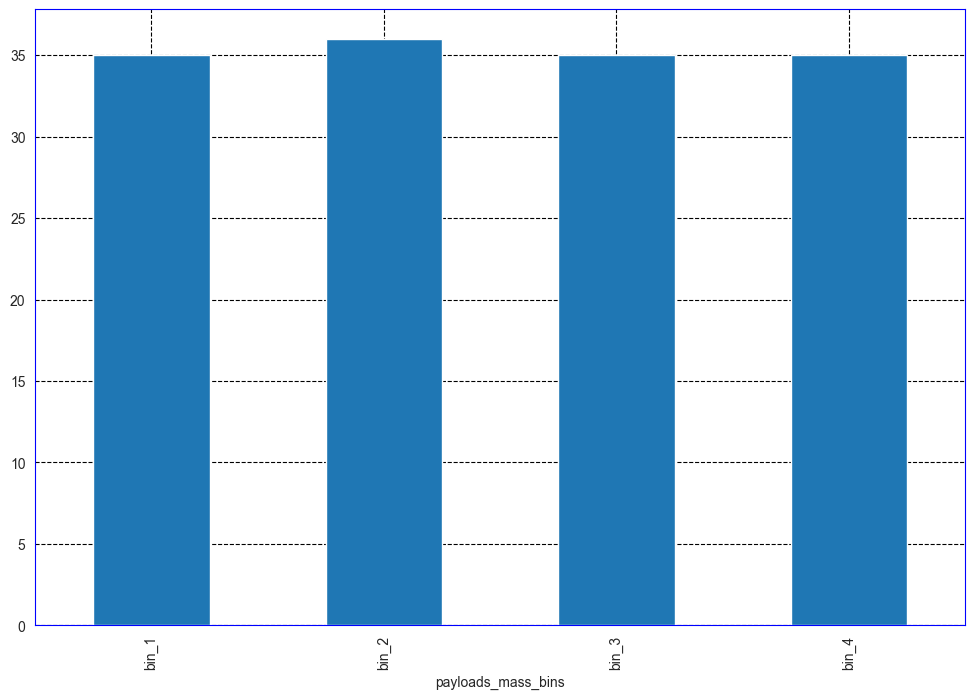

In [ ]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [ ]:
# YOUR CODE HERE (Optional)
# raise NotImplementedError()

In [ ]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

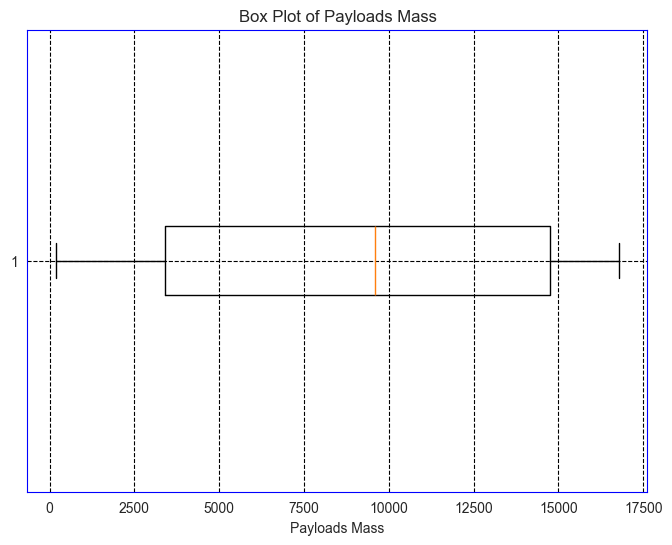

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.boxplot(raw_df['payloads_mass'], vert=False)
plt.title('Box Plot of Payloads Mass')
plt.xlabel('Payloads Mass')
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [ ]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [ ]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [ ]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

Ưu điểm: Không yêu cầu thuật toán, kỹ thuật phức tạp\
Khuyết điểm: việc cắt bỏ có thể làm mất mát dữ liệu tiềm ẩn, cần xem xét kỹ lưỡng việc chọn khoảng cắt bỏ

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

Khoảng cách IQR thường được sử dụng để giới hạn các điểm ngoại là 1,5 lần IQR phía trên phân vị thứ ba và phía dưới phân vị thứ nhất.

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [ ]:
# YOUR CODE HERE
mean = raw_df['payloads_mass'].mean()
std_dev = raw_df['payloads_mass'].std()

upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev

- Step 02: Construct rule for trimming outliers.

In [ ]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [ ]:
# YOUR CODE HERE
raw_df = raw_df.loc[~(payloadsmass_outliers), ]


TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

Ưu điểm: đơn giản, dễ triển khai. Xác định được một khoảng cụ thể\
Nhược điểm: Yêu cầu phân phối chuẩn, nếu không chuẩn có thể không chính xác. Từ ban đầu, cả trung bình và độ lệch chuẩn đã rất nhạy cảm với ngoại lệ. Phương pháp này có thể loại bỏ quá nhiều hoặc quá ít dữ liệu.

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [ ]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].quantile(0.90)
lower_bound = raw_df['payloads_mass'].quantile(0.10)

- Step 02: Construct rule for trimming outliers.

In [ ]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [ ]:
# YOUR CODE HERE
raw_df = raw_df.loc[~(payloadsmass_outliers), ]

TODO: What are the advantages and disadvantages of using Quantiles?

Ưu điểm của việc sử dụng Quantiles:\
Các phân vị ít bị ảnh hưởng bởi các phân phối lệch và các giá trị cực đoan hơn so với các phương pháp dựa trên trung bình và độ lệch chuẩn.\
Bằng cách điều chỉnh phân vị nào được sử dụng, chúng ta có thể kiểm soát mức độ nghiêm ngặt của việc xác định và loại bỏ ngoại lệ.\
Các phân vị dễ hiểu và truyền đạt, làm cho việc giải thích lý do đằng sau quyết định cắt giảm cho một đối tượng không chuyên môn trở nên dễ dàng.\
Phương pháp này điều chỉnh được theo phân phối dữ liệu cơ bản, cho phép xác định ngoại lệ được tùy chỉnh phản ánh các đặc điểm cụ thể của tập dữ liệu.
\
Nhược điểm của việc sử dụng Quantiles:\
Phương pháp này cũng có thể dẫn đến việc loại bỏ một phần đáng kể của dữ liệu, có thể bao gồm thông tin có giá trị.\
Việc lựa chọn các phân vị có phần đa là tùy tiện và có thể cần phải điều chỉnh dựa trên ngữ cảnh hoặc mục tiêu cụ thể của phân tích.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [ ]:
scaler = StandardScaler()

- Step 02: Fitting

In [ ]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [ ]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [ ]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transp

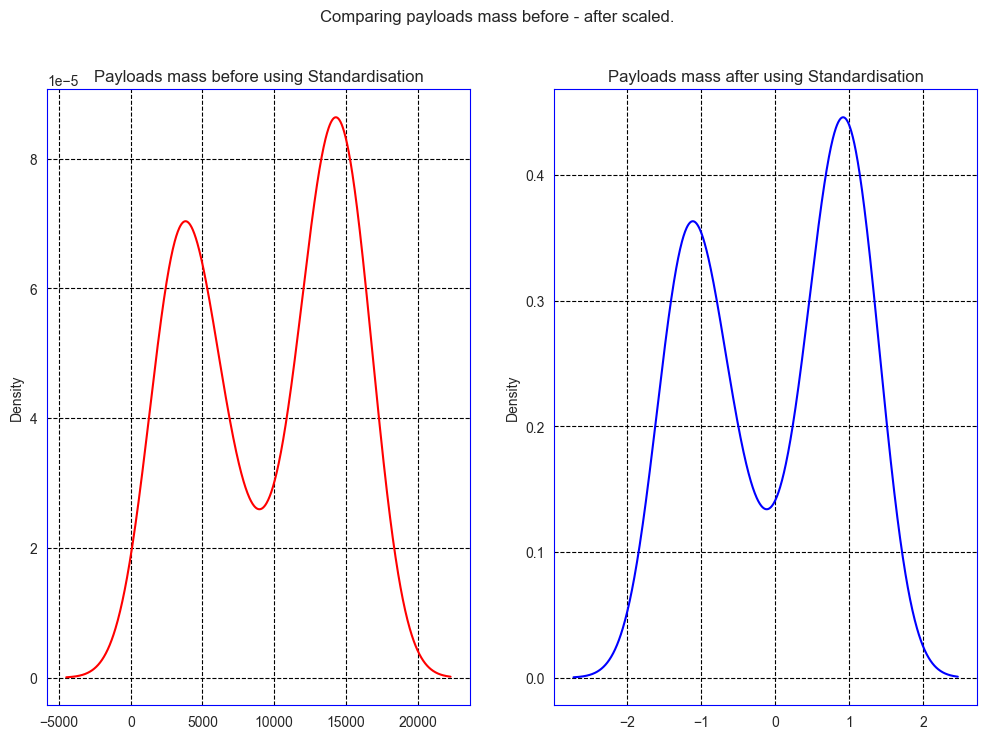

In [ ]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

In [ ]:
# YOUR CODE HERE
scaler = MinMaxScaler()

# Fit and transform the payloads_mass column
raw_df['payloads_mass_min/max_scaling'] = scaler.fit_transform(raw_df[['payloads_mass']])

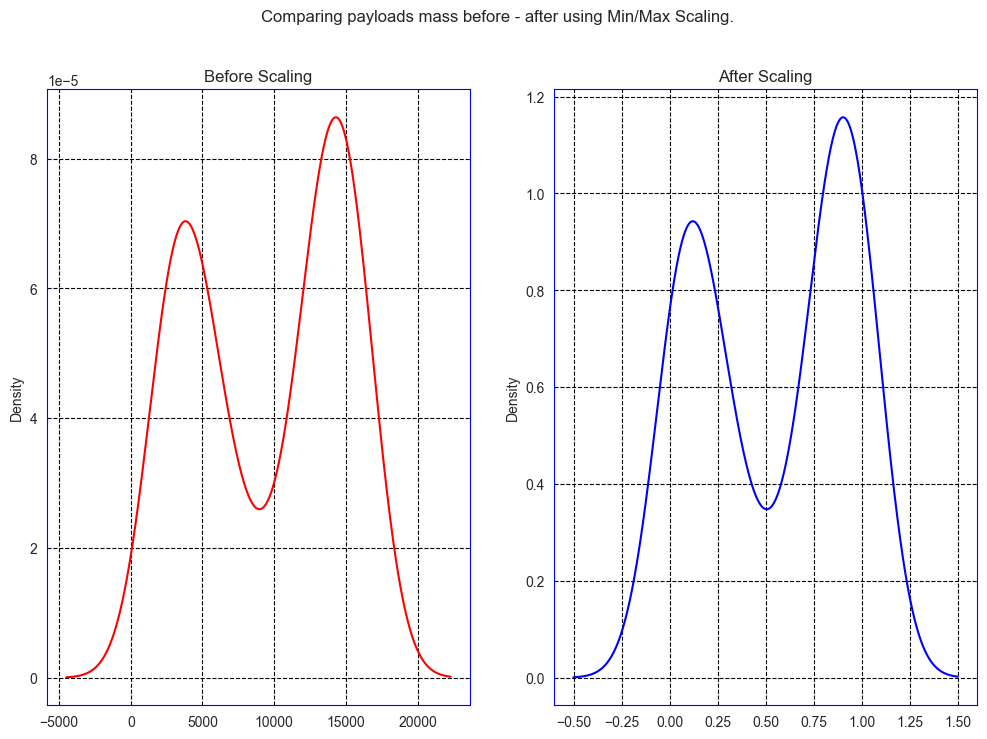

In [ ]:
fig, axes = plt.subplots(1, 2)

# Before scaling
raw_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
raw_df['payloads_mass_min/max_scaling'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Min/Max Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**


Mean normalization:\
Chuẩn hóa dữ liệu bằng cách dịch giá trị của biến sao cho giá trị trung bình của biến là 0.\
Công thức chuẩn hóa: xnorm = (x - xmean)/(xstd)\
Giữ nguyên phân phối ban đầu của dữ liệu.\
Thích hợp cho các mô hình có hàm kích hoạt như tanh hoặc sigmoid.\
Min/max scaling:\
Chuẩn hóa dữ liệu sao cho giá trị của biến nằm trong khoảng từ 0 đến 1 (hoặc bất kỳ khoảng nào khác được xác định trước).\
Công thức chuẩn hóa: xnorm = (x - xmin)/(xmax - xmin)\
Giữ nguyên tỷ lệ giữa các giá trị và khoảng giá trị của biến.\
Thích hợp cho các mô hình sử dụng hàm kích hoạt như ReLU hoặc linear activation functions.

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

In [ ]:
# YOUR CODE HERE
scaler = StandardScaler()

# Fit the scaler to the payloads_mass column and transform the data
raw_df['payloads_mass_normalization'] = scaler.fit_transform(raw_df[['payloads_mass']])

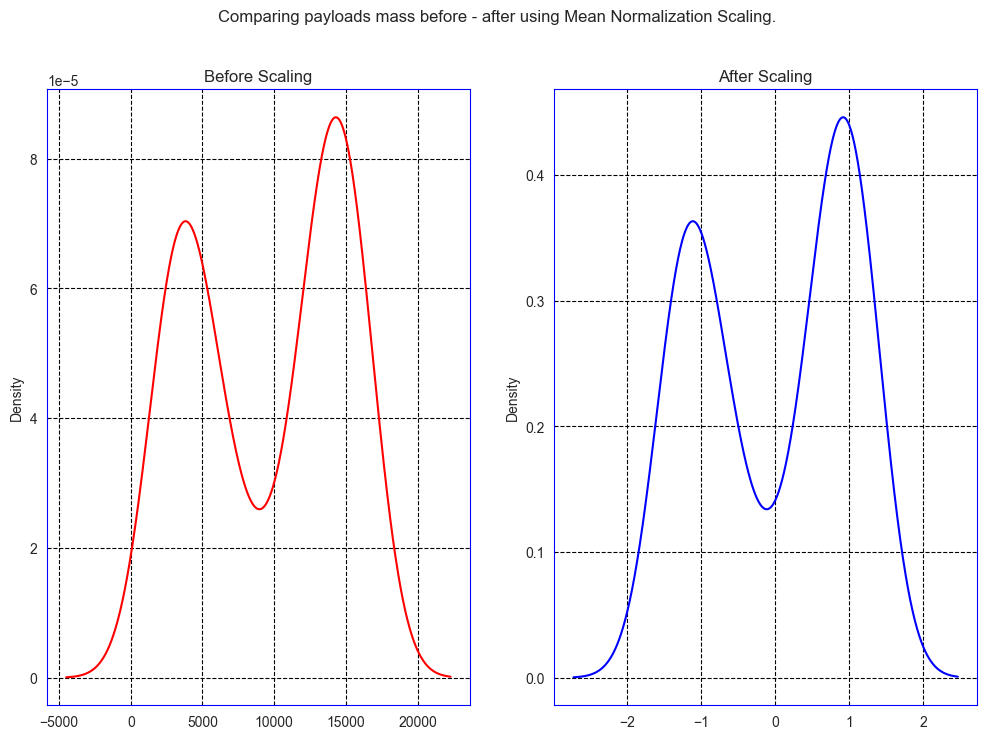

In [ ]:
fig, axes = plt.subplots(1, 2)

# Before scaling
raw_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
raw_df['payloads_mass_normalization'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Mean Normalization Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

In [ ]:
# YOUR CODE HERE
# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit the scaler to the payloads_mass column and transform the data
raw_df['payloads_mass_absolue_scaling'] = scaler.fit_transform(raw_df[['payloads_mass']])

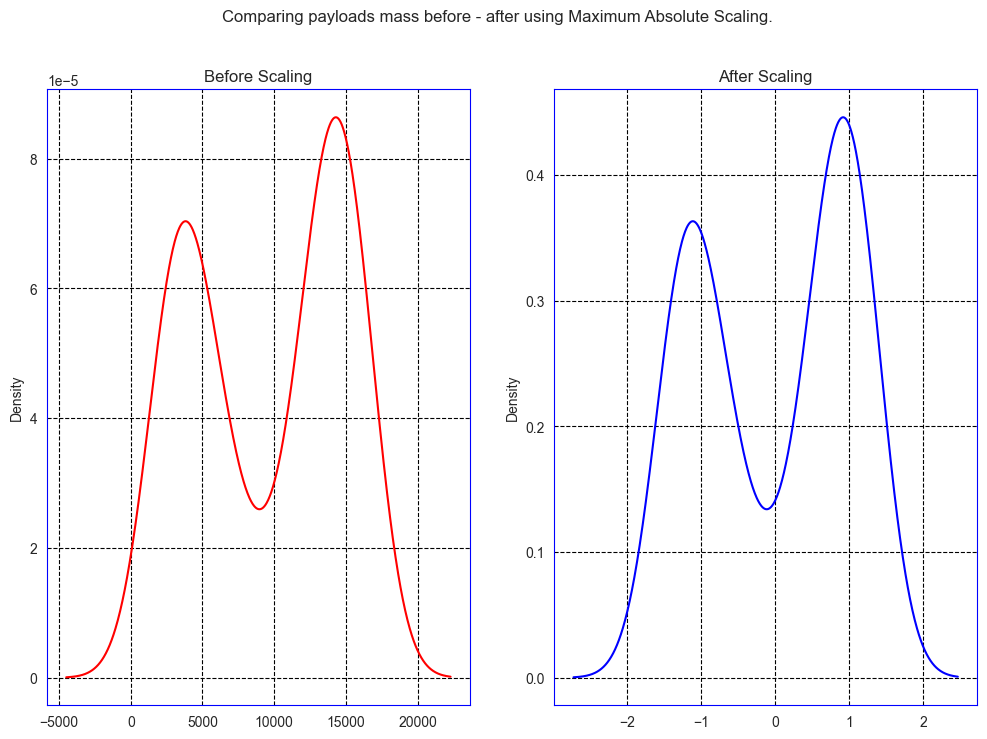

In [ ]:
fig, axes = plt.subplots(1, 2)

# Before scaling
raw_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
raw_df['payloads_mass_normalization'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Maximum Absolute Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

In [ ]:
# YOUR CODE HERE
scaler = RobustScaler()
raw_df['payloads_median_and_quantile_scaling'] = scaler.fit_transform(raw_df[['payloads_mass']])

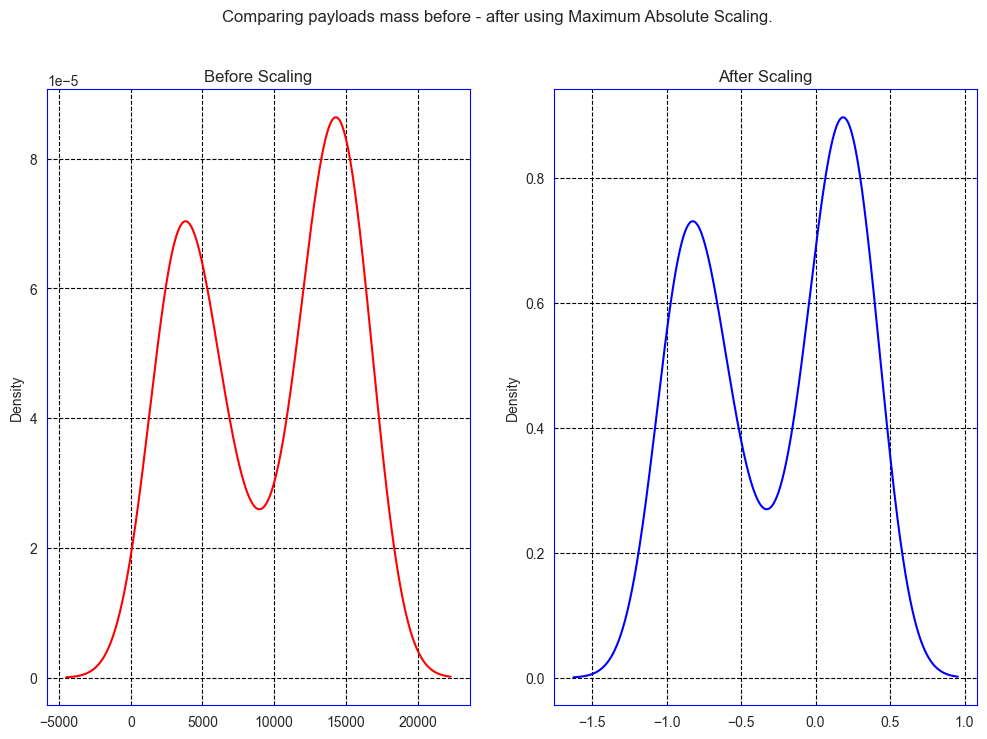

In [ ]:
fig, axes = plt.subplots(1, 2)

# Before scaling
raw_df['payloads_mass'].plot(kind="kde", ax = axes[0], color="red")
axes[0].set_title("Before Scaling")

# After scaling
raw_df['payloads_median_and_quantile_scaling'].plot(kind="kde", ax = axes[1], color="blue")
axes[1].set_title("After Scaling")

fig.suptitle("Comparing payloads mass before - after using Maximum Absolute Scaling.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

In [ ]:
# YOUR CODE HERE
normalizer = Normalizer()
raw_df['payloads_mass_vector'] = normalizer.fit_transform(raw_df[['payloads_mass']])

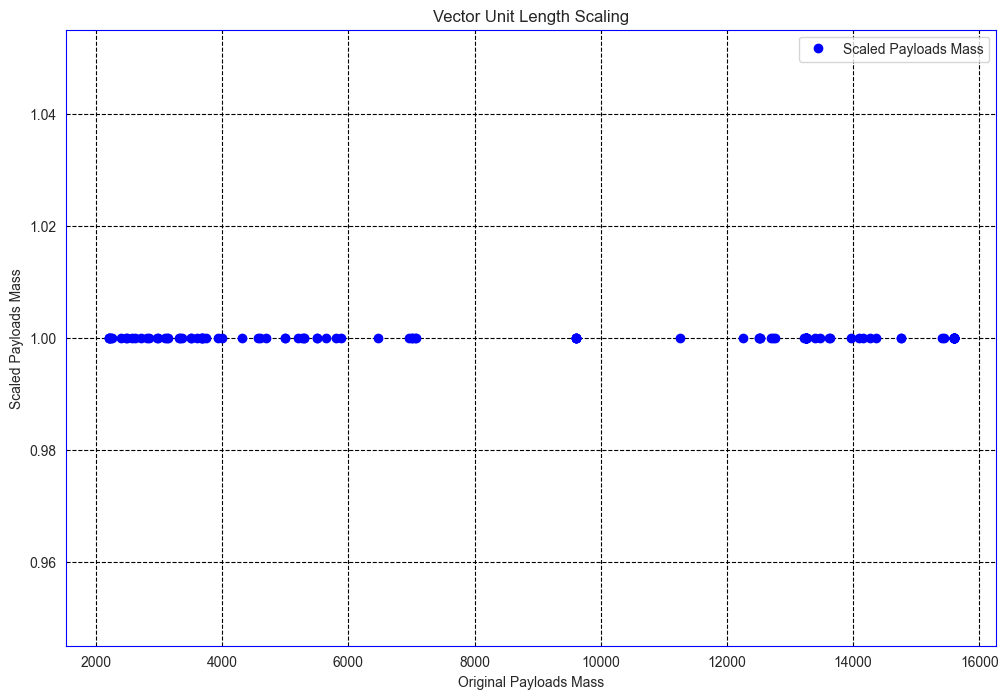

In [ ]:
plt.plot(raw_df['payloads_mass'], raw_df['payloads_mass_vector'], 'o', color='blue', label='Scaled Payloads Mass')
plt.title('Vector Unit Length Scaling')
plt.xlabel('Original Payloads Mass')
plt.ylabel('Scaled Payloads Mass')
plt.legend()
plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

Chuẩn hóa tiêu chuẩn:

Phù hợp khi phân phối của các đặc trưng có dạng Gaussian.
Thích hợp cho các thuật toán giả sử dữ liệu tập trung vào giá trị zero.\
Chuẩn hóa min-max:
Thích hợp khi các đặc trưng có giá trị tối thiểu và tối đa đã biết trước.
Hữu ích để bảo tồn các mối quan hệ giữa các giá trị gốc.\
Chuẩn hóa trung bình:
Thích hợp khi giá trị trung bình của dữ liệu cần tập trung vào zero.\
Chuẩn hóa tuyệt đối tối đa:
Hữu ích khi có ngoại lai và cần được bảo tồn.\
Chuẩn hóa dựa trên trung vị và phân vị:
Lý tưởng cho dữ liệu chứa các ngoại lai, dựa trên thống kê chắc chắn.\
Chuẩn hóa độ dài vector:
Phù hợp khi hướng của các vector dữ liệu quan trọng.

End of your lab 01.